In [1]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [2]:
#Melakukan extract dataset di collab notebook
local_zip = '/content/drive/MyDrive/Colab Notebooks/DataLemon.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DataLemon.zip'

In [ ]:
#Pencarian data training
train_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/LEMONN2')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.1)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

Found 2202 images belonging to 3 classes.


In [ ]:
#Proses penentuan data validation oleh python
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 244 images belonging to 3 classes.


In [ ]:
#Import tensorflow (nenbuat dan melatih deep learning model)
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.python.ops.gen_array_ops import Shape

In [ ]:
#proses mengklasifikasi gambar menggunakan keras tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Menemukan accuracy dari data training
model.compile(optimizer = tf.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 2)#Menemukan accuracy dari data training
model.compile(optimizer = tf.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 2)

Epoch 1/50
276/276 - 106s - loss: 0.4715 - accuracy: 0.7893 - val_loss: 0.2590 - val_accuracy: 0.8893 - 106s/epoch - 385ms/step
Epoch 2/50
276/276 - 97s - loss: 0.3509 - accuracy: 0.8601 - val_loss: 0.3154 - val_accuracy: 0.8770 - 97s/epoch - 351ms/step
Epoch 3/50
276/276 - 94s - loss: 0.2328 - accuracy: 0.9055 - val_loss: 0.2280 - val_accuracy: 0.9016 - 94s/epoch - 339ms/step
Epoch 4/50
276/276 - 91s - loss: 0.1625 - accuracy: 0.9287 - val_loss: 0.1681 - val_accuracy: 0.9344 - 91s/epoch - 329ms/step
Epoch 5/50
276/276 - 98s - loss: 0.1312 - accuracy: 0.9464 - val_loss: 0.1478 - val_accuracy: 0.9549 - 98s/epoch - 354ms/step
Epoch 6/50
276/276 - 97s - loss: 0.1111 - accuracy: 0.9609 - val_loss: 0.1342 - val_accuracy: 0.9549 - 97s/epoch - 350ms/step
Epoch 7/50
276/276 - 92s - loss: 0.0859 - accuracy: 0.9650 - val_loss: 0.2008 - val_accuracy: 0.9426 - 92s/epoch - 332ms/step
Epoch 8/50
276/276 - 97s - loss: 0.0776 - accuracy: 0.9709 - val_loss: 0.0777 - val_accuracy: 0.9713 - 97s/epoch - 3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


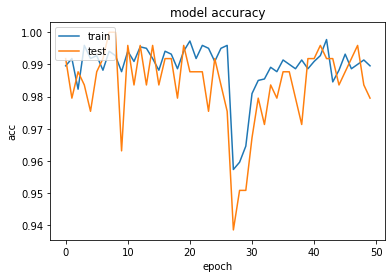

In [ ]:
#Visualisasi accuracy menggunakan grapik
import matplotlib.pyplot as plt
print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#membuat variable menampung accuracy loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

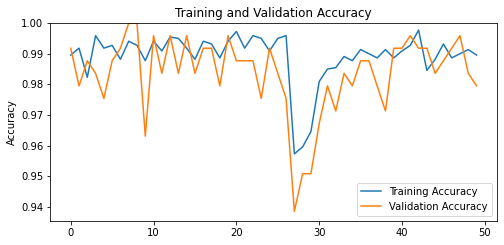

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

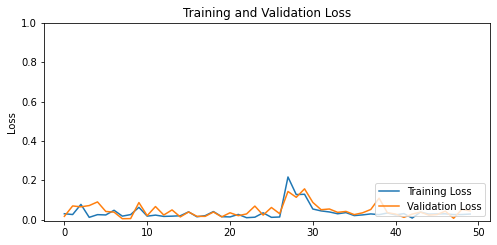

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')

In [ ]:
loss,accuracy = model.evaluate(validation_generator)
print('Test Accuracy:',accuracy)

16/16 [==============================] - 5s 282ms/step - loss: 0.0234 - accuracy: 0.9877
Test Accuracy: 0.9877049326896667


In [ ]:
model.save('DataSetLemon.h5')